In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving retail_raw_reduced.csv to retail_raw_reduced.csv


In [21]:
dataset =pd.read_csv('retail_raw_reduced.csv')

In [22]:
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))

In [37]:
data_december = dataset[(dataset['order_date'].dt.month == 12) & (dataset['order_date'].dt.year == 2019)]

brand_quantity = data_december.groupby('brand')['quantity'].sum().sort_values(ascending=False)

top_5_brands = brand_quantity.head(5)

dataset_top5brand_dec = data_december[data_december['brand'].isin(top_5_brands.index)]

print("top 5 brand dengan quantity terjual terbanyak selama bulan Desember 2019:")
print(top_5_brands)

top 5 brand dengan quantity terjual terbanyak selama bulan Desember 2019:
brand
BRAND_S    2197
BRAND_P    2194
BRAND_R    1508
BRAND_C    1365
BRAND_A    1315
Name: quantity, dtype: int64


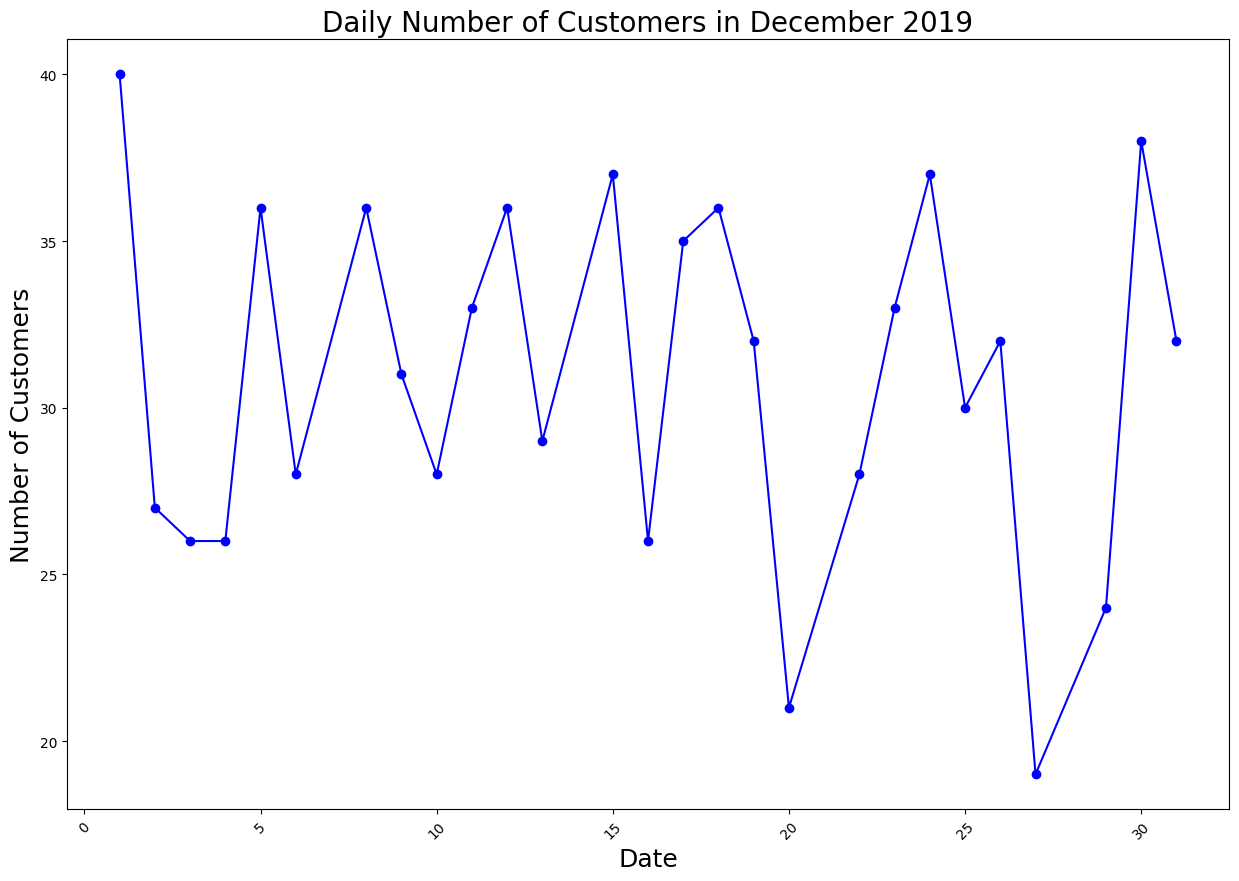

In [36]:
dataset['order_date'] = pd.to_datetime(dataset['order_date'])

data_december = dataset[(dataset['order_date'].dt.month == 12) & (dataset['order_date'].dt.year == 2019)]

daily_customers = data_december.groupby(data_december['order_date'].dt.day)['customer_id'].nunique()

plt.figure(figsize=(15, 10))

plt.plot(daily_customers.index, daily_customers.values, marker='o', color='b')

plt.title('Daily Number of Customers in December 2019', fontsize=20)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Number of Customers', fontsize=18)
plt.xticks(rotation=45)

plt.show()

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'BRAND_S'),
  Text(1, 0, 'BRAND_P'),
  Text(2, 0, 'BRAND_R'),
  Text(3, 0, 'BRAND_C'),
  Text(4, 0, 'BRAND_A')])

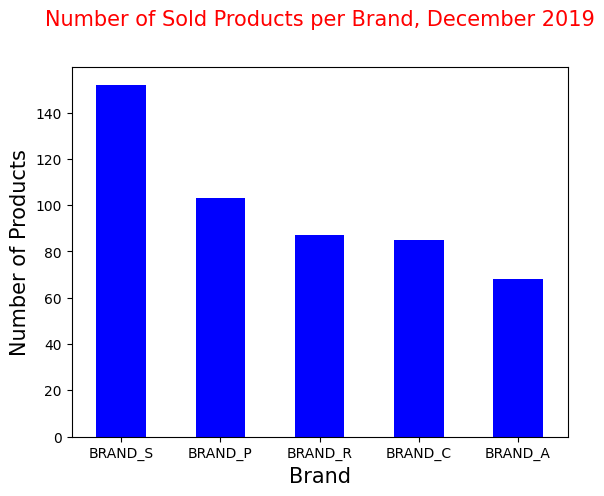

In [33]:
plt.clf()
dataset_top5brand_dec.groupby('brand')['product_id'].nunique().sort_values(ascending=False).plot(kind='bar', color='blue')
plt.title('Number of Sold Products per Brand, December 2019',loc='center',pad=30, fontsize=15, color='red')
plt.xlabel('Brand', fontsize = 15)
plt.ylabel('Number of Products',fontsize = 15)
plt.ylim(ymin=0)
plt.xticks(rotation=0)

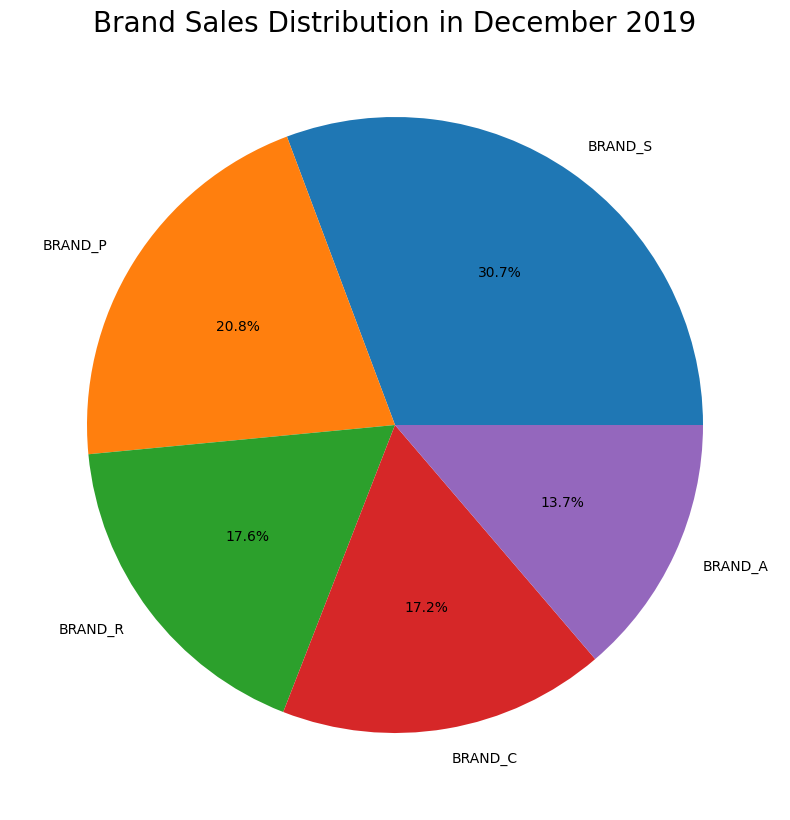

In [ ]:
plt.figure(figsize=(10, 10))
top_5_brands.plot(kind='pie', autopct='%1.1f%%')
plt.title('Brand Sales Distribution in December 2019', fontsize=20)
plt.ylabel('')
plt.show()

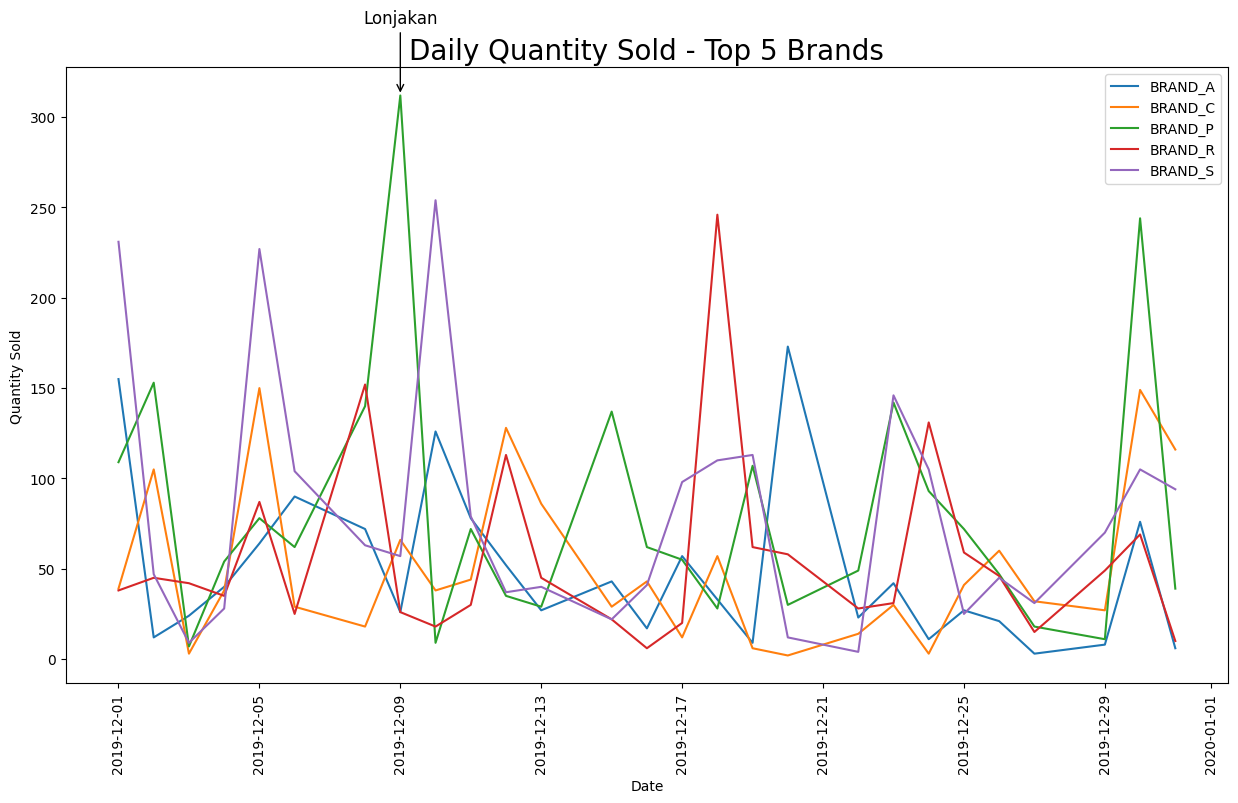

In [40]:
daily_quantity = dataset_top5brand_dec.groupby(['order_date', 'brand'])['quantity'].sum().reset_index()

plt.figure(figsize=(15, 8))
sns.lineplot(x='order_date', y='quantity', hue='brand', data=daily_quantity)

max_quantity_date = daily_quantity[daily_quantity['quantity'] == daily_quantity['quantity'].max()]['order_date'].values[0]

plt.annotate('Lonjakan', xy=(max_quantity_date, daily_quantity['quantity'].max()),
             xytext=(max_quantity_date, daily_quantity['quantity'].max() + 40),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=12, ha='center')
plt.title('Daily Quantity Sold - Top 5 Brands', fontsize=20)
plt.xlabel('Date', fontsize=10)
plt.ylabel('Quantity Sold', fontsize=10)
plt.xticks(rotation=90)
plt.legend()
plt.show()

<ipython-input-41-f2585fb02354>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_top5brand_dec['GMV'] = dataset_top5brand_dec['item_price'] * dataset_top5brand_dec['quantity']


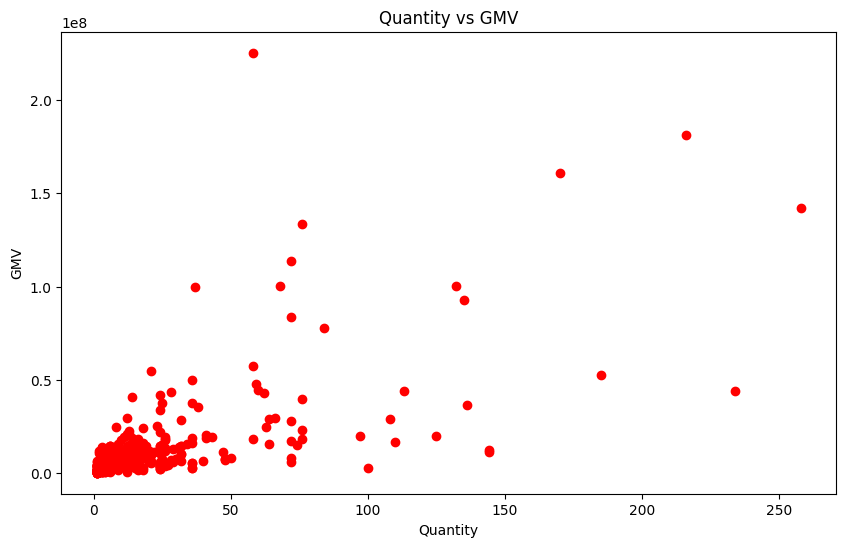

In [41]:
dataset_top5brand_dec['GMV'] = dataset_top5brand_dec['item_price'] * dataset_top5brand_dec['quantity']

product_stats = dataset_top5brand_dec.groupby('product_id').agg({'quantity': 'sum', 'GMV': 'sum'})

plt.figure(figsize=(10, 6))
plt.scatter(product_stats['quantity'], product_stats['GMV'], color='r')

plt.title('Quantity vs GMV')
plt.xlabel('Quantity')
plt.ylabel('GMV')

plt.show()

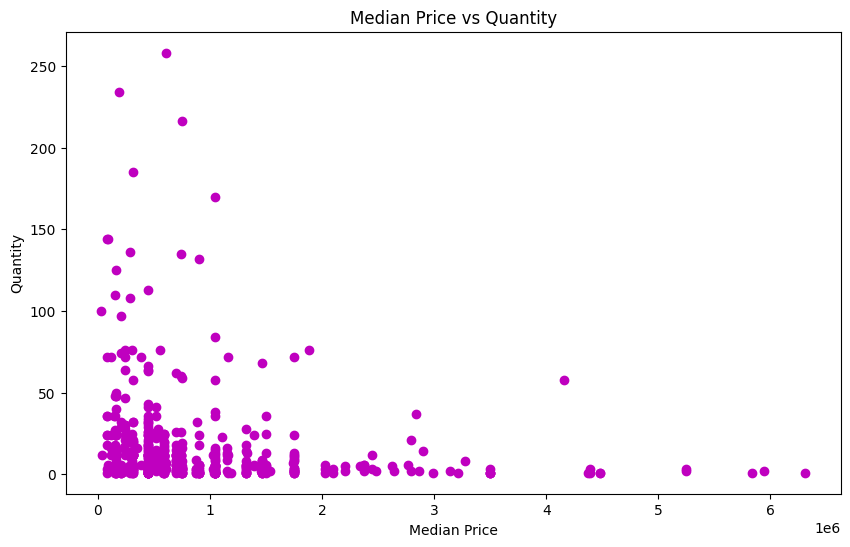

In [42]:
product_stats = dataset_top5brand_dec.groupby('product_id').agg({'quantity': 'sum', 'item_price': 'median'})

plt.figure(figsize=(10, 6))
plt.scatter(product_stats['item_price'], product_stats['quantity'], color='m')

plt.title('Median Price vs Quantity')
plt.xlabel('Median Price')
plt.ylabel('Quantity')

plt.show()
